# 2 图像点运算

# 2.1 图像的直方图


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;图像的直方图是图像的重要统计特征，它可以认为是图像灰度密度函数的近似。直方图虽然不能直接反映出图像内容，但对它进行分析可以得出图像的一些有用特征，这些特征能反映出图像的特点。当图像对比度较小时，它的灰度直方图只在灰度轴上较小的一段区间上非零，较暗的图像由于较多的像素灰度值低，因此它的直方图的主体出现在低值灰度区间上，其在高值灰度区间上的幅度较小或为零，而较亮的图像情况正好相反。通常一幅均匀量化的自然图像的灰度直方图在低值灰度区间上频率较大，这样的图像较暗区域中的细节常常看不清楚。为使图像变清晰，可以通过变换使图像的灰度动态范围变大，并且让灰度频率较小的灰度级经变换后，其频率变得大一些，使变换后的图像灰度直方图在较大的动态范围内趋于均化。事实证明，通过图像直方图修改进行图像增强是一种有效的方法。

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;计算并显示直方图
与C++中一样，在Python中调用的OpenCV直方图计算函数为cv2.calcHist。
cv2.calcHist的原型为：<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate ]]) #返回hist<br>
其中
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第一个参数必须用方括号括起来。<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第二个参数是用于计算直方图的通道，这里使用灰度图计算直方图，所以就直接使用第一个通道；<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第三个参数是Mask，这里没有使用，所以用None。<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第四个参数是histSize，表示这个直方图分成多少份（即多少个直方柱）。第二个例子将绘出直方图，到时候会清楚一点。<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第五个参数是表示直方图中各个像素的值，[0.0, 256.0]表示直方图能表示像素值从0.0到256的像素。<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;最后是两个可选参数，由于直方图作为函数结果返回了，所以第六个hist就没有意义了（待确定）<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;最后一个accumulate是一个布尔值，用来表示直方图是否叠加。<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;彩色图像不同通道的直方图<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;下面来看下彩色图像的直方图处理。以最著名的lena.jpg为例，首先读取并分离各通道：

In [9]:
#引入相关的包
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [10]:
#绘制直方图的函数
def calcAndDrawHist(image, color):  
    hist= cv2.calcHist([image], [0], None, [256], [0.0,255.0])  
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)  
    histImg = np.zeros([256,256,3], np.uint8)  
    hpt = int(0.9* 256);      
    for h in range(256):  
        intensity = int(hist[h]*hpt/maxVal)  
        cv2.line(histImg,(h,256), (h,256-intensity), color)          
    return histImg; 

In [11]:
#绘制直方图
img = cv2.imread('C:\\Users\\lenovo\\ImageProcess\\road.jpg')
b, g, r = cv2.split(img) 
histImgB = calcAndDrawHist(b, [255, 0, 0])  
histImgG = calcAndDrawHist(g, [0, 255, 0])  
histImgR = calcAndDrawHist(r, [0, 0, 255])  
cv2.imshow("histImgB", histImgB)  
cv2.imshow("histImgG", histImgG)  
cv2.imshow("histImgR", histImgR)  
cv2.imshow("Img", img)  
cv2.waitKey(0)  
cv2.destroyAllWindows() 

# 2.2 灰度变换

## 2.2.1灰度的线性变换

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;图像的灰度线性变换是通过建立灰度映射来调整原始图像的灰度，从而改善图像的质量，凸显图像的细节，提高图像的对比度。灰度线性变换的计算公式如下所示：<br>
<center>$ D_b = f(D_a)+b $</center><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;该公式中$D_b$表示灰度线性变换后的灰度值，$D_a$表示变换前输入图像的灰度值，α和b为线性变<换方程f(D)的参数，分别表示斜率和截距。<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;当α=1，b=0时，保持原始图像<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;当α=1，b!=0时，图像所有的灰度值上移或下移<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;当α=-1，b=255时，原始图像的灰度值反转<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;当α>1时，输出图像的对比度增强<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;当$0<\alpha<1$时，输出图像的对比度减小<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;当$\alpha<0$时原始图像暗区域变亮，亮区域变暗，图像求补<br>


In [12]:
#导入必要的包
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
import math

In [13]:
#灰度图像的线性变换
# -*- coding: utf-8 -*-
#读取原始图像
img = cv2.imread('C:\\Users\\lenovo\\ImageProcess\\road.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

#图像灰度上移变换 DB=DA+50
#调节不同的a和b的值，产生不同的图像效果
a=1.5
b=0
for i in range(height):
    for j in range(width):
        
        if (int(a*grayImage[i,j]+b) > 255):
            gray = 255
        else:
            gray = int(a*grayImage[i,j]+b)
            
        result[i,j] = np.uint8(gray)

#显示图像
cv2.imshow("Gray Image", grayImage)
cv2.imshow("Result", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


## 2.2.2灰度的非线性变换

一、灰度的对数变换
对数变换的一般表达式如下：<br>
<center>$t=c\log(1+s)$</center>
其中$c$为尺度比例常数，$s$为源灰度值，$t$为变换后的目标灰度值。
对数曲线中，函数自变量值低时，曲线斜率大；自变量越大，曲线斜率越小。对数变换经常用于增强图像中较暗部分的细节。
<img src="imgs/logcurve.jpg" width="40%">

In [14]:
#对数变换
# -*- coding: utf-8 -*-
#读取原始图像
img = cv2.imread('C:\\Users\\lenovo\\ImageProcess\\road.jpg')
#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]
#创建一幅图像
result = np.zeros((height, width), np.uint8)
for i in range(height):
    for j in range(width):
        gray=35 * math.log(1 + grayImage[i][j])
        result[i,j] = np.uint8(gray)
#显示图像
cv2.imshow("Gray Image", grayImage)
cv2.imshow("Result", result)
#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()

二、灰度的$\gamma$变换、分段变换、阈值变换<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;参考《数字图像处理与机器视觉》3.4、3.5、3.6节，自行编写程序练习。

## 2.3 直方图均衡化

为什么要直方图均衡化：<br>
在现实的拍摄过程中，比如说视频监控领域，由于其图像的灰度分布集中在较窄的范围内，这就导致了图像的细节不够清晰。为什么不清晰呢，因为灰度分布较窄时，那么，在计算对比度的时候，对比度就很小，所以就不清晰。为了使得图像变得清晰，那么就需要使得灰度值的差别变大，为了使得灰度值的差别变大，就意味着灰度分布就变的较宽，使得灰度值分布变得均匀，在某个灰度级区间内，像素的个数分布大致相同，这样才能使得图像的对比度增强，细节变得清晰可见。

目标：将直方图变换为一条水平直线，也就是说各种灰度的像素值在图像中均出现，提高图像的动态范围。<br>
<img src="imgs/imageEqu.png" width="40%">
方法：寻求一种变换函数能够将原始图像的直方图函数变换为灰度分布函数为一条水平直线。<br>
基本原理：目标推导一个由原图像灰度分布变换到直方图均衡化的函数。<br>
      <center>$s=T(r),0 \leq r \leq L-1$</center><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$r$代表原图的像素灰度值，$s$即为变换后灰度。<br>
为便于分析，先考虑灰度范围是[0,1]且连续的情况。此时图像的直方图是一个概率密度函数PDF。
    <center>$p(x),0\leq x \leq 1$</center>
 由概率密度函数的性质可知：<br>
    <center>$\int_0^1{p(x)dx}=1$</center><br>
   则令原图中的灰度分布的概率密度为$p_r(r)$，变换后概率密度为$p_s(s)$。<br>
<center>$p_s(s)=p_r(r)\frac{dr}{ds}$</center><br>
如果使转换后图像灰度的概率分布为1，即：$p_s(s)=1,0\leq s \leq 1$, 即直方图是均匀的，则必须满足下式：
<center>$p_r(r)=\frac{ds}{dr}$</center><br>
等式两边积分，可得下试：
<center>$s=f(r)=\int_0^r{p_r(u)du}$<br></center>
以上公式是用灰度值在[0,255]范围内推导出来的，对于[0,255]的情况只需要乘以最大灰度值$D_{max}$.<br>
<center>$D_B=f(D_A)=D_{max}\int_0^r{p_{D_A}r(\mu)d\mu}$<br></center>
式中，$D_B$为转换后的灰度值，$D_A$为转换前的灰度值。
对于离散灰度级，相应的转换公式如下：
<center>$D_B=f(D_A)=\frac{D_{max}}{A_0}\sum_0^{D_A}{H_i}$</center>
其中，$H_i$为第i级像素的个数，$A_0$是图像的面积，即像素的总数。<br>
该函数有两个主要特点：<br>
1.单调递增，即从原灰度r映射到s值是一一对应的，不会有多个灰度级映射到同一灰度上，便可求逆变换。<br>
2.从形式上可知函数的定义域和值域范围均为[0,L-1]。 不会发生灰度值越界情况。

### 2.3.1 直方图均衡化代码：不使用Opencv，使用PIL—The PythonImaging Library 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.


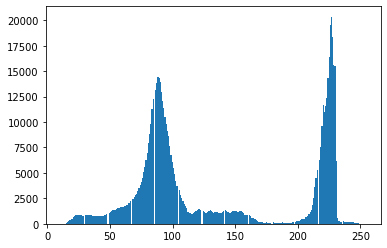

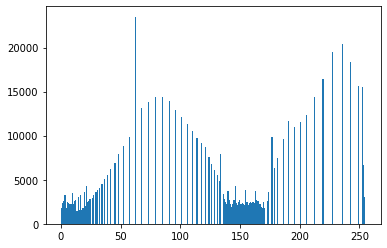

In [15]:
from PIL import Image
from pylab import *
from numpy import *


def histeq(im,nbr_bins = 256):
    """对一幅灰度图像进行直方图均衡化"""
    #计算图像的直方图
    #在numpy中，也提供了一个计算直方图的函数histogram(),第一个返回的是直方图的统计量，第二个为每个bins的中间值
    imhist,bins = histogram(im.flatten(),nbr_bins,normed= True)
    cdf = imhist.cumsum()   #
    cdf = 255.0 * cdf / cdf[-1]
    #使用累积分布函数的线性插值，计算新的像素值
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape),cdf

pil_im = Image.open('C:\\Users\\lenovo\\ImageProcess\\road.jpg')   #打开原图
pil_im_gray = pil_im.convert('L')     #转化为灰度图像
pil_im_gray.show()         #显示灰度图像

im = array(Image.open('C:\\Users\\lenovo\\ImageProcess\\road.jpg').convert('L'))
figure()
hist(im.flatten(),256)

im2,cdf = histeq(im)
figure()
hist(im2.flatten(),256)
show()

im2 = Image.fromarray(uint8(im2))
im2.show()
# print(cdf)
#plot(cdf)
im2.save("junheng.jpg")

### 2.3.2 直方图均衡化代码：使用Opencv

In [16]:
import cv2
import numpy as np
img = cv2.imread("C:\\Users\\lenovo\\ImageProcess\\road.jpg", 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("src", gray)
histImgsrc = calcAndDrawHist(gray, [0, 0, 255])   #计算原图像直方图
cv2.imshow("histsrc", histImgsrc)  
dst = cv2.equalizeHist(gray)
cv2.imshow("dst", dst)
histImgdst = calcAndDrawHist(dst, [0, 255, 0])  #计算目标图像直方图
cv2.imshow("histdst", histImgdst) 
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2.4 直方图规定化

直方图规定化的基本思想：有目的的增强某个灰度区间的图像，即能够人为地修正直方图的形状，使之与期望的图像相匹配。
直方图规定化是在运用均衡化原理的基础上，通过建立原始图像和期望图像之间的关系，选择地控制直方图，使原始图像的直方图变成规定的形状，从而弥补了直方图均衡不具备交互作用的特性。<br>
下图所示：使用均衡化的直方图做媒介，再对参考图像最均衡化的逆运算即可。直方图均衡化是直方图规定化的桥梁。<br>
<img src="imgs/imageSpeccurve.png" width="40%">
计算过程：
<img src="imgs/imageSpec.png" width="40%">
算法步骤：
1.  读取标准图像变成灰度图像，得到累计直方图
2.  读取原图变成灰度图像，得到累计直方图
3.  比较每个灰度级，得到映射关系：方法找到两个累积直方图距离最近的点
4.  原图灰度映射到新的灰度

In [17]:
## 实现直方图规定化的代码
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('imgs\\skyA.png')
img2 = cv2.imread('imgs\\skyB.png')
img_hsv1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)     # bgr转hsv 
img_hsv2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
color = ('h', 's', 'v')
for i, col in enumerate(color):
    # histr = cv2.calcHist([img_hsv1], [i], None, [256], [0, 256])
    hist1, bins = np.histogram(img_hsv1[:, :, i].ravel(), 256, [0, 256])  
    hist2, bins = np.histogram(img_hsv2[:, :, i].ravel(), 256, [0, 256])
    cdf1 = hist1.cumsum()  # 灰度值0-255的累计值数组
    cdf2 = hist2.cumsum()
    cdf1_hist = hist1.cumsum() / cdf1.max()  # 灰度值的累计值的比率
    cdf2_hist = hist2.cumsum() / cdf2.max()

    diff_cdf = [[0 for j in range(256)] for k in range(256)]  # diff_cdf 里是每2个灰度值比率间的差值
    for j in range(256):                                     
        for k in range(256):
            diff_cdf[j][k] = abs(cdf1_hist[j] - cdf2_hist[k])

    lut = [0 for j in range(256)]        # 映射表
    for j in range(256):
        min = diff_cdf[j][0]
        index = 0
        for k in range(256):            # 直方图规定化的映射原理
            if min > diff_cdf[j][k]:
                min = diff_cdf[j][k]
                index = k
        lut[j] = ([j, index])

    h = int(img_hsv1.shape[0])
    w = int(img_hsv1.shape[1])
    for j in range(h):                   # 对原图像进行灰度值的映射
        for k in range(w):
            img_hsv1[j, k, i] = lut[img_hsv1[j, k, i]][1]

hsv_img1 = cv2.cvtColor(img_hsv1, cv2.COLOR_HSV2BGR)   # hsv转bgr
hsv_img2 = cv2.cvtColor(img_hsv2, cv2.COLOR_HSV2BGR)

cv2.namedWindow('firstpic', 0)
#cv2.resizeWindow('firstpic', 670, 900)
cv2.namedWindow('targetpic', 0)
#cv2.resizeWindow('targetpic', 670, 900)
cv2.namedWindow('defpic', 0)
#cv2.resizeWindow('defpic', 670, 900)
cv2.imshow('firstpic', img1)
cv2.imshow('targetpic',img2)
# cv2.imshow('img1', img_hsv1)
cv2.imshow('defpic', hsv_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 作业

试编程实现图像灰度变换，变换公式如下：
<center>$s=T(r)=\frac{1}{1+(m/r)^E}$</center>
其中：m和E是函数的两个参数，r是像素值，请调节m和E的值，对比输出图像的不同。绘制原始图像和变换后图像的直方图，比较m和E变化时直方图形状的变化。